In [2]:
import sys
sys.path.append('..')
from osp import *

In [3]:
df=get_pmla_df()

100%|██████████| 71902/71902 [00:04<00:00, 17425.32it/s]


In [4]:
article = filter_pmla_pages(df.sample(1).iloc[0].fullText)
article

"problem of the types seems to be, in a new sense, the leading issue in contemporary literary criticism; not only are they summoned to offer proof of present usefulness, but even their identity is being doubted, and certain competent inquisitors have pronounced the nature of them to be that of wraiths and ghosts. A double assault has been made upon these time-honoured classifications, by certain estheticians on the one hand, and by an influential school of prosodists on the other. A fundamental dissension has arisen around the distinction between prose and verse. About this, indeed, it appears that rhythm does, in a general way, remain the accepted characteristic of verse-of poetry, some put it. No doubt prose, too, has its rhythm, characterized by variety. But in all generalizations-and it must be admitted that such a study as this is one of generalizations so long as a mere r6sume is attemptedthe predominating element may legitimately be taken as a sufficient characteristic. And the 

In [5]:
# doc = get_nlp_doc(article)

In [6]:
sentstr = """This is a matter of rhetoric, of style, of construction, and beyond that perhaps of ideology—specifically, the ideology of democratic government."""

sentstr_jameson = """Only Marxism can give us an adequate account of the essential mystery of the cultural past, which, like Tiresias drinking the blood, is momentarily returned to life and warmth and allowed once more to speak, and to deliver its long-forgotten message in surroundings utterly alien to it."""

sentstr_wittgenstein = """In this picture of language we find the roots of the following idea: Every word has a meaning."""

sentdoc = get_nlp_doc(sentstr_wittgenstein)
sent = sentdoc.sentences[0]
# sent

In [7]:
def get_sent_tree(sent):
    if isinstance(sent, str):
        sent = get_nlp_doc(sent).sentences[0]
    treestr = str(sent.constituency)
    return nltk.ParentedTree.fromstring(treestr)

tree_wittgenstein = get_sent_tree(sentstr_wittgenstein)
tree_jameson = get_sent_tree(sentstr_jameson)

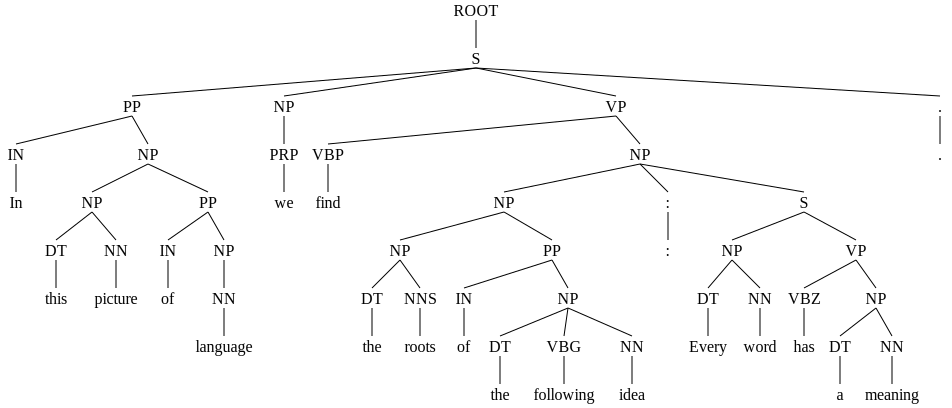

In [8]:
tree_wittgenstein
# tree_jameson

In [9]:
def is_in_sbar(tree):
    parent = tree.parent()
    while parent is not None:
        if parent.label() == 'SBAR':
            return True
        parent = parent.parent()
    return False

def get_num_independent_clauses(tree):
    return len([t for t in tree.subtrees(lambda t: t.label() == 'S' and not is_in_sbar(t))])

def get_num_dependent_clauses(tree):
    return len([t for t in tree.subtrees(lambda t: t.label() == 'SBAR')])

def get_num_words_in_dependent_clauses(tree):
    return sum([len(t.leaves()) for t in tree.subtrees(lambda t: t.label() == 'SBAR')])

def get_num_words(tree):
    return len(tree.leaves())

def get_num_words_in_independent_clauses(tree):
    return get_num_words(tree) - get_num_words_in_dependent_clauses(tree)

get_num_independent_clauses(tree_wittgenstein), get_num_independent_clauses(tree_jameson)
get_num_dependent_clauses(tree_wittgenstein), get_num_dependent_clauses(tree_jameson)
get_num_words_in_dependent_clauses(tree_wittgenstein), get_num_words_in_dependent_clauses(tree_jameson)
get_num_words_in_independent_clauses(tree_wittgenstein), get_num_words_in_independent_clauses(tree_jameson)
get_num_words(tree_wittgenstein), get_num_words(tree_jameson)

(20, 54)

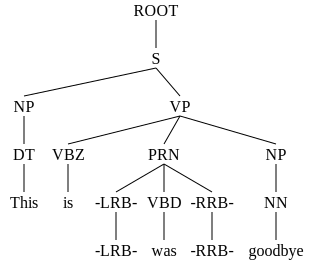

In [10]:
tree = get_sent_tree("This is (was) goodbye")
tree

In [38]:
import string

def get_num_punct(tree, punct_type=None):
    if punct_type is None:
        out = len([t for t in tree.subtrees() if t.label() in string.punctuation])
        return out + get_num_parens(tree)
    else:
        return len([t for t in tree.subtrees() if t.label() == punct_type])

def get_num_parens(tree, paren_set={'-LRB-', '-RRB-'}):
    return len([t for t in tree.subtrees() if t.label() in paren_set])

get_num_punct(tree)

2

In [39]:
from collections import Counter

pos_names = {'N': 'noun', 'V': 'verb', 'J': 'adjective', 'R': 'adverb'}
def get_pos_stats(tree):
    pos_counter = Counter()
    for x in tree.productions():
        if x.is_lexical():
            pos = x.lhs().symbol()[0]
            if pos in pos_names:
                pos_counter[pos_names[pos]] += 1
    return pos_counter

get_pos_stats(tree_wittgenstein)

Counter({'noun': 6, 'verb': 3})

In [41]:
def get_tree_stats(tree):
    dpos = get_pos_stats(tree)
    d = {
        'num_words': get_num_words(tree),
        'height': tree.height(),
        'num_independent_clauses': get_num_independent_clauses(tree),
        'num_dependent_clauses': get_num_dependent_clauses(tree),
        'num_words_in_dependent_clauses': get_num_words_in_dependent_clauses(tree),
        'num_words_in_independent_clauses': get_num_words_in_independent_clauses(tree),
        'num_punct': get_num_punct(tree),
        'num_punct_colon': get_num_punct(tree, ':'),
        'num_punct_comma': get_num_punct(tree, ','),
        'num_parens': get_num_parens(tree),
        **{f'num_words_{pos}': dpos[pos] for pos in dpos}
    }
    return d

get_tree_stats(tree_wittgenstein)

{'num_words': 20,
 'height': 9,
 'num_independent_clauses': 2,
 'num_dependent_clauses': 0,
 'num_words_in_dependent_clauses': 0,
 'num_words_in_independent_clauses': 20,
 'num_punct': 2,
 'num_punct_colon': 1,
 'num_punct_comma': 0,
 'num_parens': 0,
 'num_words_noun': 6,
 'num_words_verb': 3}

In [13]:
get_tree_stats(tree_jameson)

{'num_words': 54,
 'height': 20,
 'num_independent_clauses': 1,
 'num_dependent_clauses': 1,
 'num_words_in_dependent_clauses': 36,
 'num_words_in_independent_clauses': 18,
 'num_punct': 5,
 'num_punct_colon': 0,
 'num_punct_comma': 4,
 'num_parens': 0}

In [34]:
for x in tree_jameson.productions():
    if x.is_lexical():
        print(x.lhs().symbol(), x.rhs())

RB ('Only',)
NNP ('Marxism',)
MD ('can',)
VB ('give',)
PRP ('us',)
DT ('an',)
JJ ('adequate',)
NN ('account',)
IN ('of',)
DT ('the',)
JJ ('essential',)
NN ('mystery',)
IN ('of',)
DT ('the',)
JJ ('cultural',)
NN ('past',)
, (',',)
WDT ('which',)
, (',',)
IN ('like',)
NNP ('Tiresias',)
VBG ('drinking',)
DT ('the',)
NN ('blood',)
, (',',)
VBZ ('is',)
RB ('momentarily',)
VBN ('returned',)
IN ('to',)
NN ('life',)
CC ('and',)
NN ('warmth',)
CC ('and',)
VBN ('allowed',)
RB ('once',)
JJR ('more',)
TO ('to',)
VB ('speak',)
, (',',)
CC ('and',)
TO ('to',)
VB ('deliver',)
PRP$ ('its',)
JJ ('long',)
HYPH ('-',)
VBN ('forgotten',)
NN ('message',)
IN ('in',)
NNS ('surroundings',)
RB ('utterly',)
JJ ('alien',)
IN ('to',)
PRP ('it',)
. ('.',)


Counter({'noun': 6, 'verb': 3})

In [37]:
get_pos_stats(tree_jameson)

Counter({'noun': 10, 'verb': 8, 'adjective': 6, 'adverb': 4})

In [26]:
x=prod1.lhs()
x.symbol()

'ROOT'